# Demonstrate Linking CPR to SST


In [34]:
import sys
import os
sys.path.append('/home/jovyan/intake-aodn/')
import xarray as xr
import geopandas as gpd
import intake_aodn
import pandas as pd
import rioxarray
from shapely.geometry import mapping
from  intake_aodn.easicache import set_easi
import geopandas as gpd
intake_aodn.cat = set_easi()

/home/jovyan/intake-aodn/intake_aodn/catalogs/aodn_refs.zip aodn_refs.zip s3://easihub-csiro-user-scratch/AROAWO7MSC2TWB77JYRIM:csiro-csiro-aad_mor582@csiro.au/aodn_refs.zip
/home/jovyan/intake-aodn/intake_aodn/catalogs/main.yaml main.yaml s3://easihub-csiro-user-scratch/AROAWO7MSC2TWB77JYRIM:csiro-csiro-aad_mor582@csiro.au/main.yaml
/home/jovyan/intake-aodn/intake_aodn/catalogs/aodn.yaml aodn.yaml s3://easihub-csiro-user-scratch/AROAWO7MSC2TWB77JYRIM:csiro-csiro-aad_mor582@csiro.au/aodn.yaml
/home/jovyan/intake-aodn/intake_aodn/catalogs/nci.yaml nci.yaml s3://easihub-csiro-user-scratch/AROAWO7MSC2TWB77JYRIM:csiro-csiro-aad_mor582@csiro.au/nci.yaml


# 1. Fetch  IMOS CPR Data

In [35]:
#Use the intake catalogy to ask for data from IMOS Portal
df =intake_aodn.cat.aodn_s3.CPR.read().set_index('TripCode').sort_index()
df['SampleTime_UTC'] = pd.to_datetime(df['SampleTime_UTC'])
df

,FID,Latitude,Longitude,SampleTime_UTC,SampleTime_Local,Year_Local,Month_Local,Day_Local,Time_Local24hr,PCI,...,NoPhytoSpecies_Sample,ShannonPhytoDiversity,PhytoEvenness,NoDiatomSpecies_Sample,ShannonDiatomDiversity,DiatomEvenness,NoDinoSpecies_Sample,ShannonDinoDiversity,DinoflagellateEvenness,geom
TripCode,,,,,,,,,,,,,,,,,,,,,
ABAB20200227,cpr_derived_indices_data.fid-1a24491c_1827186f...,-37.9138,135.3310,2020-02-27 02:01:35,2020-02-27 11:31:35,2020,2,27,11:31,1,...,1.0,0.0000,NaN,0.0,NaN,NaN,1.0,0.0000,NaN,POINT (135.33099 -37.91378)
ABAB20200227,cpr_derived_indices_data.fid-1a24491c_1827186f...,-37.8766,134.9125,2020-02-27 03:10:21,2020-02-27 12:40:21,2020,2,27,12:40,1,...,2.0,0.4506,0.6500,0.0,NaN,NaN,2.0,0.4506,0.6500,POINT (134.91247 -37.87656)
ABAB20200227,cpr_derived_indices_data.fid-1a24491c_1827186f...,-37.8378,134.4944,2020-02-27 04:19:07,2020-02-27 13:49:07,2020,2,27,13:49,1,...,2.0,0.4506,0.6500,0.0,NaN,NaN,2.0,0.4506,0.6500,POINT (134.49437 -37.83785)
ABAB20200227,cpr_derived_indices_data.fid-1a24491c_1827186f...,-37.7977,134.0767,2020-02-27 05:27:52,2020-02-27 14:57:52,2020,2,27,14:57,1,...,5.0,1.5117,0.9393,0.0,NaN,NaN,5.0,1.5117,0.9393,POINT (134.07673 -37.79766)
ABAB20200227,cpr_derived_indices_data.fid-1a24491c_1827186f...,-37.7560,133.6596,2020-02-27 06:36:38,2020-02-27 16:06:38,2020,2,27,16:06,1,...,1.0,0.0000,NaN,0.0,NaN,NaN,1.0,0.0000,NaN,POINT (133.65955 -37.75601)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TOCA20131108,cpr_derived_indices_data.fid-1a24491c_1827186f...,-18.0651,146.3827,2013-11-11 11:39:53,2013-11-11 21:39:53,2013,11,11,21:39,1,...,3.0,1.0986,1.0000,0.0,NaN,NaN,3.0,1.0986,1.0000,POINT (146.38274 -18.06507)
TOCA20131108,cpr_derived_indices_data.fid-1a24491c_1827186f...,-17.7495,146.2662,2013-11-12 11:23:51,2013-11-12 21:23:51,2013,11,12,21:23,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (146.26623 -17.74954)
TOCA20131108,cpr_derived_indices_data.fid-1a24491c_1827186f...,-17.4339,146.1501,2013-11-13 11:07:49,2013-11-13 21:07:49,2013,11,13,21:07,3,...,4.0,1.3863,1.0000,0.0,NaN,NaN,4.0,1.3863,1.0000,POINT (146.15013 -17.43393)


# 2. How Many Unique Voyages?

In [37]:
df.index.unique()

Index(['ABAB20200227', 'ABFR20140923', 'ABFR20141203', 'ABFR20150812',
       'ABFR20151116', 'ABFR20161103', 'ABFR20170308', 'ADAB20140120',
       'ADAB20140331', 'ADAB20140610',
       ...
       'SYME20140603', 'SYME20140916', 'SYME20141126', 'SYME20150301',
       'SYME20150721', 'SYME20151110', 'SYME20160308', 'SYME20160730',
       'TINT20171001', 'TOCA20131108'],
      dtype='object', name='TripCode', length=219)

In [38]:
(df.groupby('TripCode').SampleTime_UTC.max() -df.groupby('TripCode').SampleTime_UTC.min()).round('1D')

TripCode
ABAB20200227   1 days
ABFR20140923   1 days
ABFR20141203   2 days
ABFR20150812   1 days
ABFR20151116   1 days
                ...  
SYME20151110   1 days
SYME20160308   0 days
SYME20160730   1 days
TINT20171001   1 days
TOCA20131108   7 days
Name: SampleTime_UTC, Length: 219, dtype: timedelta64[ns]

# 3. Select a Voyage

In [39]:
voyage = 'TOCA20131108'
trip = df.loc[voyage].copy()
trip

,FID,Latitude,Longitude,SampleTime_UTC,SampleTime_Local,Year_Local,Month_Local,Day_Local,Time_Local24hr,PCI,...,NoPhytoSpecies_Sample,ShannonPhytoDiversity,PhytoEvenness,NoDiatomSpecies_Sample,ShannonDiatomDiversity,DiatomEvenness,NoDinoSpecies_Sample,ShannonDinoDiversity,DinoflagellateEvenness,geom
TripCode,,,,,,,,,,,,,,,,,,,,,
TOCA20131108,cpr_derived_indices_data.fid-1a24491c_1827186f...,-18.9538,146.8489,2013-11-08 12:27:59,2013-11-08 22:27:59,2013,11,8,22:27,2,...,2.0,0.6931,1.0,0.0,NaN,NaN,2.0,0.6931,1.0,POINT (146.8489 -18.95382)
TOCA20131108,cpr_derived_indices_data.fid-1a24491c_1827186f...,-18.6558,146.6972,2013-11-09 12:11:57,2013-11-09 22:11:57,2013,11,9,22:11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (146.69718 -18.65579)
TOCA20131108,cpr_derived_indices_data.fid-1a24491c_1827186f...,-18.3805,146.4997,2013-11-10 11:55:55,2013-11-10 21:55:55,2013,11,10,21:55,2,...,1.0,0.0000,NaN,0.0,NaN,NaN,1.0,0.0000,NaN,POINT (146.49968 -18.38054)
TOCA20131108,cpr_derived_indices_data.fid-1a24491c_1827186f...,-18.0651,146.3827,2013-11-11 11:39:53,2013-11-11 21:39:53,2013,11,11,21:39,1,...,3.0,1.0986,1.0,0.0,NaN,NaN,3.0,1.0986,1.0,POINT (146.38274 -18.06507)
TOCA20131108,cpr_derived_indices_data.fid-1a24491c_1827186f...,-17.7495,146.2662,2013-11-12 11:23:51,2013-11-12 21:23:51,2013,11,12,21:23,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (146.26623 -17.74954)
TOCA20131108,cpr_derived_indices_data.fid-1a24491c_1827186f...,-17.4339,146.1501,2013-11-13 11:07:49,2013-11-13 21:07:49,2013,11,13,21:07,3,...,4.0,1.3863,1.0,0.0,NaN,NaN,4.0,1.3863,1.0,POINT (146.15013 -17.43393)
TOCA20131108,cpr_derived_indices_data.fid-1a24491c_1827186f...,-17.1183,146.0344,2013-11-14 10:51:47,2013-11-14 20:51:47,2013,11,14,20:51,3,...,2.0,0.6931,1.0,0.0,NaN,NaN,2.0,0.6931,1.0,POINT (146.03442 -17.11826)
TOCA20131108,cpr_derived_indices_data.fid-1a24491c_1827186f...,-16.8025,145.9191,2013-11-15 10:35:45,2013-11-15 20:35:45,2013,11,15,20:35,3,...,3.0,1.0986,1.0,0.0,NaN,NaN,2.0,0.6931,1.0,POINT (145.91911 -16.80253)


# 4. Make a GeoPandas DataFrame

In [40]:
gdf = gpd.GeoDataFrame(trip,geometry=gpd.points_from_xy(trip.Longitude, trip.Latitude))

# 5. Plot the Voyage

In [41]:
from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
 LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,
 MarkerCluster, Heatmap,SearchControl, 
 FullScreenControl)

import geopandas, pandas as pd, numpy as np
from ipywidgets import Text, HTML, IntSlider, jslink



m = Map(center=(trip.Latitude.mean(), trip.Longitude.mean()), zoom=3,hight=100)

numpoints = 10
center = (7.43, 46.91)

geo_data = GeoData(geo_dataframe =  gdf[['Latitude','Longitude','geometry']],
    style={'color': 'black', 'radius':8, 'fillColor': '#3366cc', 'opacity':0.5, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
    hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
    point_style={'radius': 2, 'color': 'red', 'fillOpacity': 0.8, 'fillColor': 'blue', 'weight': 3},
    name = 'name')
m.add_layer(geo_data)

def update_html(feature, **kwargs):
     html.value = '''<h3>Region:<b>{}</b></h3>'''.format(feature['properties']['REGION'])
geo_data.on_hover(update_html)

zoom_slider = IntSlider(description='Zoom level:', min=0, max=15, value=6)
jslink((zoom_slider, 'value'), (m, 'zoom'))
widgetControl = WidgetControl(widget=zoom_slider, position='topright')
m.add_control(widgetControl)

m.layout.width = '50%'
m

Map(center=[-17.894925, 146.34978750000002], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_…

# 6. Calculate the Date Range

In [42]:
days =  pd.to_timedelta('20D')
starttime =trip.SampleTime_UTC.round('1D').min()
endtime =trip.SampleTime_UTC.round('1D').max() 
print (f'start date:{starttime} end date: {endtime}')

start date:2013-11-09 00:00:00 end date: 2013-11-15 00:00:00


# 7. Start a local cluster to process the data

In [43]:
# from intake_aodn.utils import get_distributed_cluster
# client = get_distributed_cluster(worker_memory=4.0)
# client

from intake_aodn.utils import get_local_cluster
client = get_local_cluster(n_workers=16,threads_per_worker=16)
client

<Client: 'tcp://127.0.0.1:8786' processes=16 threads=256, memory=24.00 GiB>

# 8. Get SST data from IMOS S3

In [44]:
entry=intake_aodn.cat.aodn_s3.SST_L3S_1d_ngt(startdt=starttime - days,
                                             enddt=endtime,
                                             cropto=gdf.buffer(1))
ds = entry.to_dask()
kelvintoc = 273.15
depthcorrection = 0.17
ds['SST_at_depth']= ds.sea_surface_temperature.where(ds['quality_level'] >=4) - ds.sses_bias + depthcorrection - kelvintoc
ds['SST_at_depth'].attrs ={'comment':'SST data with corrections apllied to depth',
                       'long name':'sea surface temperature at depth',
                       'unit':'degC'}

In [45]:
#Check the size of the object
ds.nbytes/(1024*1024)

33.133140563964844

In [46]:
ds

<xarray.Dataset>
Dimensions:                            (time: 26, latitude: 208, longitude: 146)
Coordinates:
  * latitude                           (latitude) float32 -15.81 ... -19.95
  * longitude                          (longitude) float32 144.9 144.9 ... 147.8
  * time                               (time) datetime64[ns] 2013-10-20T15:20...
Data variables:
    satellite_zenith_angle             (time, latitude, longitude) float32 dask.array<chunksize=(26, 208, 146), meta=np.ndarray>
    sses_standard_deviation            (time, latitude, longitude) float32 dask.array<chunksize=(26, 208, 146), meta=np.ndarray>
    sea_surface_temperature_day_night  (time, latitude, longitude) float32 dask.array<chunksize=(26, 208, 146), meta=np.ndarray>
    sea_surface_temperature            (time, latitude, longitude) float32 dask.array<chunksize=(26, 208, 146), meta=np.ndarray>
    quality_level                      (time, latitude, longitude) float32 dask.array<chunksize=(26, 208, 146), meta=np.ndarray>
    sses_count                         (time, latitude, longitude) float32 dask.array<chunksize=(26, 208, 146), meta=np.ndarray>
    l2p_flags                          (time, latitude, longitude) float32 dask.array<chunksize=(26, 208, 146), meta=np.ndarray>
    sses_bias                          (time, latitude, longitude) float32 dask.array<chunksize=(26, 208, 146), meta=np.ndarray>
    sst_dtime                          (time, latitude, longitude) float64 dask.array<chunksize=(26, 208, 146), meta=np.ndarray>
    SST_at_depth                       (time, latitude, longitude) float32 dask.array<chunksize=(26, 208, 146), meta=np.ndarray>

In [47]:
# get the actual data!
ds = ds.compute()

# 9. Calculate the mean of the 14 days prior to the sample date

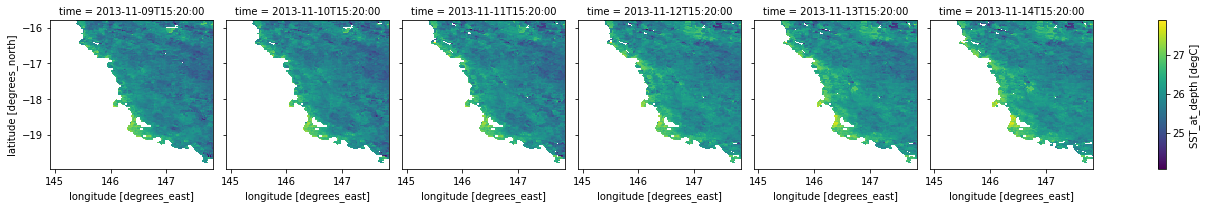

In [48]:
means =ds.SST_at_depth.rolling(time=14,min_periods=1,center=False).mean(skipna=True).sel(time=slice(starttime,endtime))
means.plot(col='time')

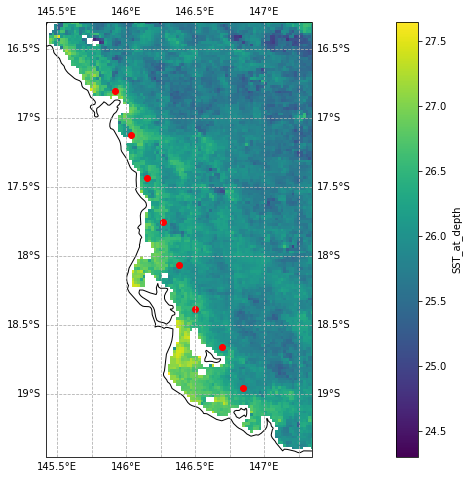

In [49]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,8))
ax = plt.axes(projection = ccrs.PlateCarree());

means.mean(dim='time').plot(ax=ax)
ax.scatter(trip.Longitude,trip.Latitude,c='red')
ax.coastlines()
ax.gridlines(draw_labels=True,linestyle = '--')
ax.set_extent([trip.Longitude.min()-0.5,trip.Longitude.max()+0.5,trip.Latitude.min()-0.5,trip.Latitude.max()+0.5],crs=ccrs.PlateCarree())


# 10. Crop the areas of interest

In [50]:
def getmapping(ds,g,crs):
    crop ={}
    lonmin,latmin,lonmax,latmax=g.geometry.buffer(0.1).bounds                  
    crop['latitude']=slice(latmax,latmin)
    crop['longitude']=slice(lonmin,lonmax)
    crop['method']=None
    ds=ds.sel(**crop)
    ds =ds.rio.set_spatial_dims(x_dim="longitude", y_dim="latitude", inplace=True)
    ds.rio.write_crs("epsg:4326", inplace=True)
    clipped = ds.rio.clip([mapping(g['geometry'])],crs, drop=False)
    return clipped


In [51]:
crops =[ getmapping(means.to_dataset().sel(time=item.SampleTime_UTC.round('1D'),method='nearest')[['SST_at_depth']],item,gdf.crs) for row,item in gdf.iterrows()]

In [52]:
xr.concat(crops,dim='TIME')

<xarray.Dataset>
Dimensions:       (latitude: 80, longitude: 56, TIME: 8)
Coordinates:
  * latitude      (latitude) float32 -19.05 -19.03 -19.01 ... -16.73 -16.71
  * longitude     (longitude) float32 145.8 145.9 145.9 ... 146.9 146.9 146.9
    time          (TIME) datetime64[ns] 2013-11-09T15:20:00 ... 2013-11-14T15...
    spatial_ref   int64 0
Dimensions without coordinates: TIME
Data variables:
    SST_at_depth  (TIME, latitude, longitude) float32 nan nan nan ... nan nan

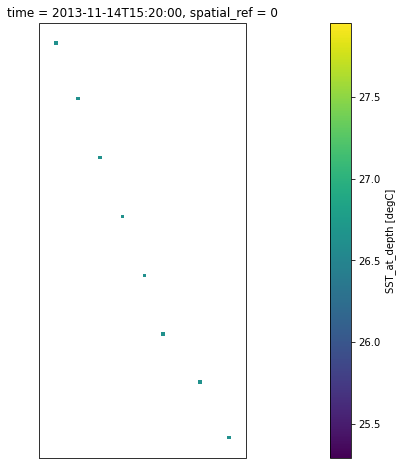

In [53]:
fig = plt.figure(figsize=(30,8))
ax = plt.axes(projection = ccrs.PlateCarree());
for i in range(0,len(crops)):
    crops[i].SST_at_depth.plot(ax=ax,add_colorbar=False)
crops[i].SST_at_depth.plot(ax=ax)

In [25]:
sampleTemp =xr.concat([ x.mean() for x in crops],dim='time')

In [26]:
sampleTemp.time.dt.date

<xarray.DataArray 'date' (time: 8)>
array([datetime.date(2013, 11, 9), datetime.date(2013, 11, 9),
       datetime.date(2013, 11, 9), datetime.date(2013, 11, 10),
       datetime.date(2013, 11, 11), datetime.date(2013, 11, 12),
       datetime.date(2013, 11, 13), datetime.date(2013, 11, 14)],
      dtype=object)
Coordinates:
  * time         (time) datetime64[ns] 2013-11-09T15:20:00 ... 2013-11-14T15:...
    spatial_ref  int64 0

# 11. Copy the extracted SST back to the trip table

In [54]:
trip = trip.copy()
trip['Sample_UTC_Date']= trip.SampleTime_UTC.dt.date
trip =trip.set_index('Sample_UTC_Date')
trip['SST']=np.nan
trip.loc[sampleTemp.time.dt.date,'SST'] = sampleTemp.SST_at_depth


In [55]:
trip

,FID,Latitude,Longitude,SampleTime_UTC,SampleTime_Local,Year_Local,Month_Local,Day_Local,Time_Local24hr,PCI,...,PhytoEvenness,NoDiatomSpecies_Sample,ShannonDiatomDiversity,DiatomEvenness,NoDinoSpecies_Sample,ShannonDinoDiversity,DinoflagellateEvenness,geom,geometry,SST
Sample_UTC_Date,,,,,,,,,,,,,,,,,,,,,
2013-11-08,cpr_derived_indices_data.fid-1a24491c_1827186f...,-18.9538,146.8489,2013-11-08 12:27:59,2013-11-08 22:27:59,2013,11,8,22:27,2,...,1.0,0.0,NaN,NaN,2.0,0.6931,1.0,POINT (146.8489 -18.95382),POINT (146.84890 -18.95380),25.757757
2013-11-09,cpr_derived_indices_data.fid-1a24491c_1827186f...,-18.6558,146.6972,2013-11-09 12:11:57,2013-11-09 22:11:57,2013,11,9,22:11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (146.69718 -18.65579),POINT (146.69720 -18.65580),26.000214
2013-11-10,cpr_derived_indices_data.fid-1a24491c_1827186f...,-18.3805,146.4997,2013-11-10 11:55:55,2013-11-10 21:55:55,2013,11,10,21:55,2,...,NaN,0.0,NaN,NaN,1.0,0.0000,NaN,POINT (146.49968 -18.38054),POINT (146.49970 -18.38050),26.287039
2013-11-11,cpr_derived_indices_data.fid-1a24491c_1827186f...,-18.0651,146.3827,2013-11-11 11:39:53,2013-11-11 21:39:53,2013,11,11,21:39,1,...,1.0,0.0,NaN,NaN,3.0,1.0986,1.0,POINT (146.38274 -18.06507),POINT (146.38270 -18.06510),26.294952
2013-11-12,cpr_derived_indices_data.fid-1a24491c_1827186f...,-17.7495,146.2662,2013-11-12 11:23:51,2013-11-12 21:23:51,2013,11,12,21:23,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (146.26623 -17.74954),POINT (146.26620 -17.74950),25.893438
2013-11-13,cpr_derived_indices_data.fid-1a24491c_1827186f...,-17.4339,146.1501,2013-11-13 11:07:49,2013-11-13 21:07:49,2013,11,13,21:07,3,...,1.0,0.0,NaN,NaN,4.0,1.3863,1.0,POINT (146.15013 -17.43393),POINT (146.15010 -17.43390),25.552582
2013-11-14,cpr_derived_indices_data.fid-1a24491c_1827186f...,-17.1183,146.0344,2013-11-14 10:51:47,2013-11-14 20:51:47,2013,11,14,20:51,3,...,1.0,0.0,NaN,NaN,2.0,0.6931,1.0,POINT (146.03442 -17.11826),POINT (146.03440 -17.11830),26.202942
2013-11-15,cpr_derived_indices_data.fid-1a24491c_1827186f...,-16.8025,145.9191,2013-11-15 10:35:45,2013-11-15 20:35:45,2013,11,15,20:35,3,...,1.0,0.0,NaN,NaN,2.0,0.6931,1.0,POINT (145.91911 -16.80253),POINT (145.91910 -16.80250),26.622513


In [30]:
trip.to_csv(f'{voyage}_SST.csv')

# Exersize how would you do this for every voyage?

In [32]:
for voyage,data in df.groupby('TripCode'):
    print(f'{voyage} point count:{len(data)}')

ABAB20200227 point count:23
ABFR20140923 point count:22
ABFR20141203 point count:21
ABFR20150812 point count:18
ABFR20151116 point count:22
ABFR20161103 point count:23
ABFR20170308 point count:22
ADAB20140120 point count:24
ADAB20140331 point count:23
ADAB20140610 point count:23
ADAB20140921 point count:16
ADAB20141202 point count:22
ADAB20151115 point count:21
ADAB20161102 point count:17
ADAB20161202 point count:21
ADAB20170307 point count:23
ADME20190806 point count:20
ANHO20071125 point count:358
ANHO20080121 point count:166
ANHO20090215 point count:200
ANHO20100322 point count:355
ANHO20110201 point count:133
ANHO20130106 point count:58
ANHO20130219 point count:90
ANHO20160105 point count:16
ANHO20170120 point count:15
ANHO20180110 point count:15
ANHO20190302 point count:12
ANHO20210313 point count:10
AUHO20110607 point count:49
BRER20140502 point count:15
BRER20140606 point count:15
BRFI20120504 point count:14
BRGL20140101 point count:12
BRGL20140923 point count:12
BRGL20150130 po